In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [89]:
C2023II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2023II.csv')
C2024I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024I.csv')
C2024II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024II.csv')
C2025I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2025I.csv')

In [90]:
#creamos una columna con el periodo del examen para cada periodo
C2023II['periodo'] = "2023II"
C2024I['periodo'] = "2024I"
C2024II['periodo'] = "2024II"
C2025I['periodo'] = "2025I"



resultados_exam.tail()

In [91]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [92]:
        #cambiamos el nombre de las columnas
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation'
}

C2023II.rename(columns=columns, inplace = True)

C2023II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24553 entries, 0 to 24552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   24553 non-null  int64  
 1   full_name    24553 non-null  object 
 2   career_1     24553 non-null  object 
 3   score        24099 non-null  float64
 4   merit_order  3751 non-null   float64
 5   observation  4205 non-null   object 
 6   periodo      24553 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [93]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P ALCANZA VACANTE':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA SEGUNDA OPCIÓN':'career_2'
}

C2024I.rename(columns=columns, inplace = True)

C2024I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28862 entries, 0 to 28861
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   28862 non-null  int64  
 1   full_name    28862 non-null  object 
 2   career_1     28862 non-null  object 
 3   score        28527 non-null  float64
 4   merit_order  2124 non-null   float64
 5   observation  2459 non-null   object 
 6   career_2     303 non-null    object 
 7   periodo      28862 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [94]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL (PRIMERA OPCIÓN)':'career_1',
    'PUNTAJE':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA PROFESIONAL (SEGUNDA OPCIÓN)':'career_2'
}

C2024II.rename(columns=columns, inplace = True)

C2024II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   22077 non-null  int64  
 1   full_name    22077 non-null  object 
 2   career_1     22077 non-null  object 
 3   score        21868 non-null  float64
 4   merit_order  2630 non-null   float64
 5   observation  2839 non-null   object 
 6   career_2     512 non-null    object 
 7   periodo      22077 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [95]:
# #cambiamos el nombre de las columnas
columns = {
     'CODIGO':'student_id',
     'APELLIDOS Y NOMBRES':'full_name',
     'ESCUELA PROFESIONAL':'career_1',
     'PUNTAJE':'score',
     'MERITOE.P':'merit_order',
     'OBSERVACI&OacuteN':'observation'
 }

C2025I.rename(columns=columns, inplace = True)

C2025I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   18650 non-null  int64  
 1   full_name    18650 non-null  object 
 2   career_1     18650 non-null  object 
 3   score        18468 non-null  float64
 4   merit_order  2136 non-null   float64
 5   observation  2318 non-null   object 
 6   periodo      18650 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1020.1+ KB


In [96]:
#anexamos los dataframes

resultados_exam = pd.concat([C2023II, C2024I, C2024II, C2025I], ignore_index = True)

In [97]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2
60355,806491,"SALAS HUAPAYA, JESUS JOAQUIN",DERECHO - LIMA,1239.500,106.0,ALCANZO VACANTE PRIMERA OPCIÃN,2024II,NaN
15473,589652,"SOLARI GARRIDO, MATIAS ADRIANO",ECONOMÍA,389.625,NaN,NaN,2023II,NaN
43868,796074,"BLAS ATOCHE, MICAELA CAROLINA",HISTORIA,551.625,NaN,NaN,2024I,NaN
45285,227849,"CCUNO LLONTOP, JHOSEP RAFAEL",INGENIERÍA CIVIL,692.750,NaN,NaN,2024I,NaN
62972,806746,"TREJO QUILLAHUAMAN, RUT NOEMI",EDUCACIÓN SECUNDARIA,986.000,44.0,ALCANZO VACANTE PRIMERA OPCIÃN,2024II,NaN
56454,881939,"ROMAN CHIMAICO, GUNTHER FRANKLIN",MEDICINA HUMANA,733.625,NaN,NaN,2024II,NaN
63440,114938,"CCENTE RAMOS, LESLIE FIORELA",MEDICINA VETERINARIA,818.125,NaN,NaN,2024II,NaN
17789,276148,"CAYCHO ORTIZ DE ORUE, MANUEL ALONSO",INGENIERÍA CIVIL,603.750,NaN,NaN,2023II,NaN
12817,562804,"MOGROVEJO GARCÍA, MARCO ANTONIO",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES - LIMA,732.500,NaN,NaN,2023II,NaN
84630,592319,"CARDENAS LOPEZ, THAIS SUNMI EUSEBIA",ECONOMÍA,757.000,NaN,NaN,2025I,NaN


In [98]:
resultados_exam['location'] = resultados_exam['career_1'].str.extract(r' - (.+)')  # Extraer 'LIMA'
resultados_exam['career_1'] = resultados_exam['career_1'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [99]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
88059,267847,"JERI LUJAN, ISABELA YAMILE",INGENIERÍA CIVIL,1029.375,NaN,NaN,2025I,NaN,NaN
73984,233599,"FELIPA HERNANDEZ, LUIS JAIR",INGENIERÍA DE SISTEMAS,1239.500,33.0,ALCANZO VACANTE PRIMERA OPCIÃN,2024II,NaN,NaN
13487,219795,"CERNA ACOSTA, JULIO ANDRES",GENÉTICA Y BIOTECNOLOGÍA,859.250,NaN,NaN,2023II,NaN,NaN
40161,590643,"RUIZ ALBORNOZ, MARIO ZORAM",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,480.125,NaN,NaN,2024I,NaN,LIMA
44217,792394,"FLORES PIZARRO, BRENDA SOLEDAD",TRABAJO SOCIAL,439.500,NaN,NaN,2024I,NaN,NaN
57383,182008,"LAVADO CHACA, LESSLIE DAMARIS",OBSTETRICIA,563.500,NaN,NaN,2024II,NaN,NaN
76242,769354,"ESLADO MARÍN, ALIZEÉ ANGÉLICA",DERECHO,771.250,NaN,NaN,2025I,NaN,NaN
48145,153607,"CHICNES DE LA CRUZ, LEIDY LAURA",PSICOLOGÍA,442.625,NaN,NaN,2024I,NaN,NaN
81835,552559,"GUZMÁN SANDVAL, MARIA MILAGROS JAMILLE",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,566.000,NaN,NaN,2025I,NaN,LIMA
15930,587064,"RAMIREZ SEVILLANO, LINDALUZ MAYLI",ECONOMÍA INTERNACIONAL,649.625,NaN,NaN,2023II,NaN,NaN


In [100]:
resultados_exam['periodo'].unique()

array(['2023II', '2024I', '2024II', '2025I'], dtype=object)

In [101]:
resultados_exam['observation'].unique()

array([nan, 'ALCANZO VACANTE', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO',
       'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N',
       'ALCANZO VACANTE PRIMERA OPCIÃ\x93N'], dtype=object)

In [102]:
#corregimos los textos

resultados_exam['observation'] = resultados_exam['observation'].replace({
    'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N':'ALCANZO VACANTE SEGUNDA OPCIÓN',
    'ALCANZO VACANTE PRIMERA OPCIÃ\x93N':'ALCANZO VACANTE PRIMERA OPCION',
    'ALCANZO VACANTE':'ALCANZO VACANTE PRIMERA OPCION'
})

In [103]:
resultados_exam['observation'] = resultados_exam['observation'].fillna('NO ALCANZO VACANTE')
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [104]:
resultados_exam['location'] = resultados_exam['location'].fillna('LIMA')

resultados_exam['location'].unique()

array(['LIMA', 'S.J.L', 'HUARAL', 'VILLA RICA', 'CHILCA', 'OYÓN',
       'HUARMEY'], dtype=object)

In [105]:
resultados_exam['career_2'].unique()

array([nan, 'OBSTETRICIA', 'TOXICOLOGÍA', 'TEC. MED. RADIOLOGÍA',
       'CIENCIAS DE LOS ALIMENTOS', 'TEC. MED. TERAPIA OCUPACIONAL',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN', 'EDUCACIÓN INICIAL',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN',
       'CONSERVACIÓN Y RESTAURACIÓN', 'GEOGRAFÍA', 'ARTE', 'ANTROPOLOGÍA',
       'ARQUEOLOGÍA', 'FILOSOFÍA',
       'PRESUPUESTO Y FINANZAS PÚBLICAS - LIMA', 'ADMINISTRACIÓN - S.J.L',
       'GESTIÓN TRIBUTARIA - LIMA', 'ADMINISTRACIÓN DE TURISMO - LIMA',
       'ECONOMÍA PÚBLICA', 'CONTABILIDAD - S.J.L',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - LIMA',
       'CIENCIAS BIOLÓGICAS', 'QUÍMICA', 'ESTADÍSTICA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - S.J.L',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA ELECTRÓNICA',
       'INGENIERÍA DE TELECOMUNICACIONES',
       'INGENIERÍA MECÁNICA DE FLUIDOS',
       'ING

In [106]:
#analizamos los tipos de datos y corregimos en base a las necesidades para el analisis
resultados_exam['student_id'] = resultados_exam['student_id'].astype(object)

resultados_exam.tail()


,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
94137,227692,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIA DE LA COMPUTACIÓN,1009.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94138,224825,"YUPANQUI CARPIO, DIEGO ANDRE",CIENCIA DE LA COMPUTACIÓN,1101.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94139,306406,"YUPANQUI TICLLACURI, ANDY",CIENCIA DE LA COMPUTACIÓN,1119.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94140,298747,"ZAPATA MOREYRA, ALEXIS EDUARDO",CIENCIA DE LA COMPUTACIÓN,790.125,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94141,294156,"ZARATE FERNANDEZ, NIKOLE RUBY",CIENCIA DE LA COMPUTACIÓN,1025.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA


In [107]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [108]:
# resultados_exam.to_csv('resultados examen consolidado', index=False)

## EXPLORACION DE LOS DATOS

¿Cuál es la distribución de puntajes entre los estudiantes de diferentes carreras?
Analiza si hay carreras con puntajes consistentemente más altos o más bajos.

¿Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.

¿Cuál es el promedio de puntajes por carrera?
Calcula el promedio de puntajes para cada carrera para ver cómo se comparan entre sí.

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.

¿Qué porcentaje de estudiantes tiene un puntaje por encima de 600?
Determina cuántos estudiantes tienen un puntaje superior a 600 en relación al total.

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

¿Existen diferencias notables en puntajes entre las diferentes cohortes de estudiantes (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de los estudiantes en las diferentes cohortes.

¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.

1. Distribucion de los puntajes de los estudiantes de las carreras

    Se creo una funcion que muestra un histograma con la distribucion de los puntajes por cada carrera y por perido que escogieron los postulantes como primera opcion.

In [109]:
# Definimos la función para analizar la distribución de puntajes por carrera
def hist_career(career, periodo):
    # Filtrar el DataFrame para obtener solo los datos de la carrera deseada
    career_data = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['periodo'] == periodo)]
    
    # Verificar si hay datos para la carrera especificada
    if not career_data.empty:
        # Crear un histograma de los puntajes
        plt.figure(figsize=(10, 6))
        sns.histplot(career_data['score'], bins=10, kde=True)  # Agregar KDE para suavizar la curva
        plt.title(f'DISTRIBUCIÓN DE PUNTAJES EN {career} - {periodo}')
        plt.xlabel('Puntaje')
        plt.ylabel('Frecuencia')
        plt.axvline(career_data['score'].max(), color='red', linestyle='--', label='Puntaje Máximo')
        plt.legend()
        plt.show()
        
        # Imprimir el puntaje máximo
        max_score = career_data['score'].max()
        min_score = career_data[career_data['observation'] == 'ALCANZO VACANTE PRIMERA OPCION']['score'].min()
    
        print(f'EL PUNTAJE MÁXIMO PARA {career} ES {max_score} Y EL PUNTAJE MINIMO ES {min_score} EN EL PERIODO {periodo}')
    else:
        print(f'No hay datos disponibles para la carrera {career}.')

In [110]:
resultados_exam['career_1'].unique()

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN',
       'TEC. MED. RADIOLOGÍA', 'TEC. MED. TERAPIA OCUPACIONAL',
       'NUTRICION', 'DERECHO', 'CIENCIA POLÍTICA', 'LITERATURA',
       'FILOSOFÍA', 'LINGUÍSTICA', 'COMUNICACIÓN SOCIAL', 'ARTE',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN', 'DANZA',
       'CONSERVACIÓN Y RESTAURACIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'EDUCACIÓN INICIAL', 'EDUCACIÓN PRIMARIA', 'EDUCACIÓN SECUNDARIA',
       'EDUCACIÓN FÍSICA', 'QUÍMICA', 'INGENIERÍA QUÍMICA',
       'INGENIERÍA AGROINDUSTRIAL', 'MEDICINA VETERINARIA',
       'ADMINISTRACIÓN', 'ADMINISTRACIÓN DE TURISMO',
       'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'CONTABILIDAD',
       'GESTIÓN TRIBUTARIA', 'AUDIT

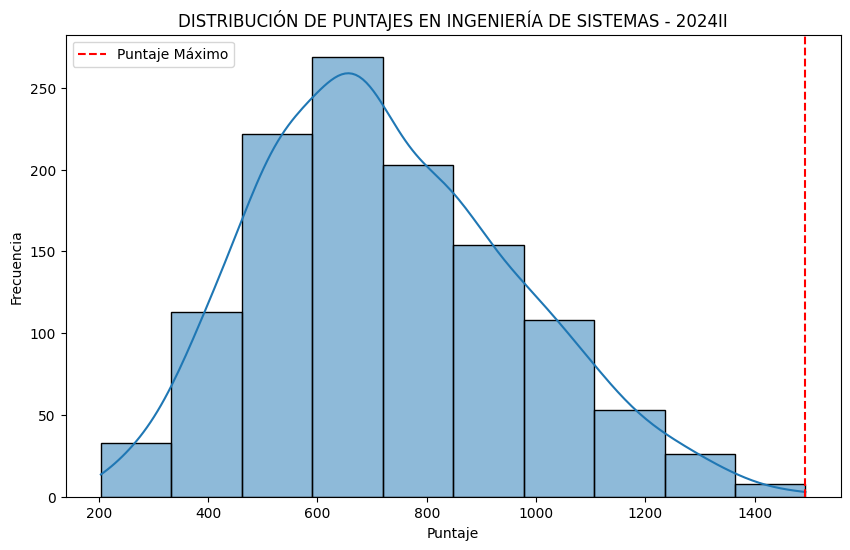

EL PUNTAJE MÁXIMO PARA INGENIERÍA DE SISTEMAS ES 1493.0 Y EL PUNTAJE MINIMO ES 1197.25 EN EL PERIODO 2024II


In [111]:
hist_career('INGENIERÍA DE SISTEMAS', '2024II')  # Reemplaza con la carrera que deseas analizar

Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

In [112]:
highest_score = resultados_exam.loc[resultados_exam.groupby('periodo')['score'].idxmax()]
highest_score[['full_name','career_1','score', 'periodo']]

,full_name,career_1,score,periodo
7442,"ROJAS BENITES, CAMILA JIMENA",DERECHO,1556.375,2023II
43854,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,2024I
64882,"FUSTAMANTE CUEVA, ISIS MICHELLE",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1563.125,2024II
77677,"TICLLASUCA ACLARI, JOSEPH CARLOS",DERECHO,1717.370,2025I


¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.


In [113]:
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [114]:
vacant_reached = resultados_exam[
    (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION') | (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') | (resultados_exam['observation'] == 'NO ALCANZO VACANTE')
]

In [115]:
vacant_reached['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION',
       'ALCANZO VACANTE SEGUNDA OPCIÓN'], dtype=object)

In [116]:
comparison = vacant_reached.groupby(['periodo','observation'])['observation'].count().reset_index(name = 'count')
comparison

,periodo,observation,count
0,2023II,ALCANZO VACANTE PRIMERA OPCION,3751
1,2023II,NO ALCANZO VACANTE,20348
2,2024I,ALCANZO VACANTE PRIMERA OPCION,1821
3,2024I,ALCANZO VACANTE SEGUNDA OPCIÓN,303
4,2024I,NO ALCANZO VACANTE,26403
5,2024II,ALCANZO VACANTE PRIMERA OPCION,2118
6,2024II,ALCANZO VACANTE SEGUNDA OPCIÓN,512
7,2024II,NO ALCANZO VACANTE,19238
8,2025I,ALCANZO VACANTE PRIMERA OPCION,2136
9,2025I,NO ALCANZO VACANTE,16332


In [117]:
# Pivotar el DataFrame para tener 'observation' como columnas
pivot_comparison = comparison.pivot(index='periodo', columns='observation', values='count').fillna(0)
pivot_comparison

observation,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,NO ALCANZO VACANTE
periodo,,,
2023II,3751.0,0.0,20348.0
2024I,1821.0,303.0,26403.0
2024II,2118.0,512.0,19238.0
2025I,2136.0,0.0,16332.0


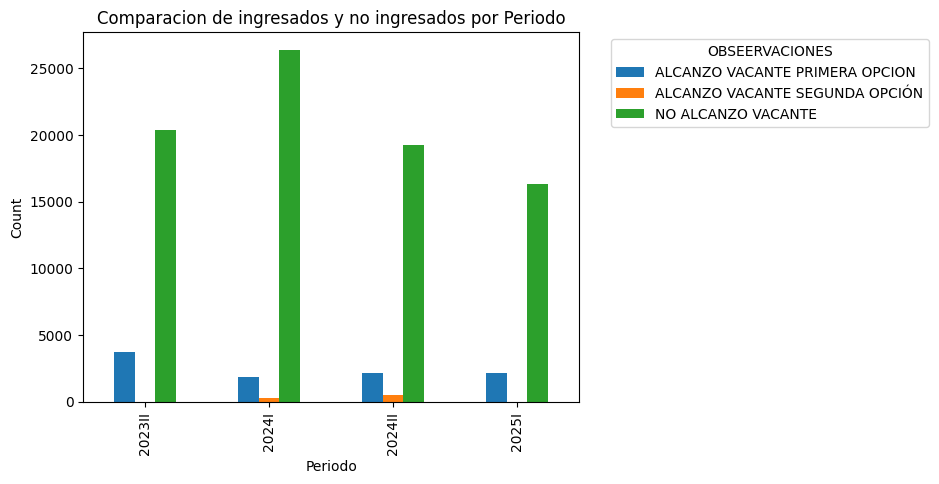

In [118]:
# Crear el gráfico de barras apilado
pivot_comparison.plot(kind = 'bar')
# Configurar etiquetas y título
plt.title('Comparacion de ingresados y no ingresados por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Count')
plt.legend(title='OBSEERVACIONES', bbox_to_anchor=(1.05, 1), loc='upper left')

¿Cuál es el maximo de puntaje por carrera?
Calcula el promedio de puntaje para cada carrera para ver cómo se comparan entre sí.

In [119]:
def mean_score(periodo):

    #filtramos por periodo
    periodo_filter = resultados_exam[resultados_exam['periodo'] == periodo]

    #agrupamos por carrera y mostramos el promedio
    max_score = periodo_filter.groupby('career_1')['score'].max().sort_values(ascending = False).reset_index()
    top10 = max_score.nlargest(20, 'score')
    #creamos un grafico de lineas
    plt.figure(figsize = (10,6))
    sns.lineplot(x = 'career_1', y = 'score', data=top10)
    plt.xlabel('Carrera')
    plt.ylabel('Puntaje maximo')
    plt.title(f'Puntaje maximo por carrera en el periodo {periodo}')
    plt.xticks(rotation = 90)
   


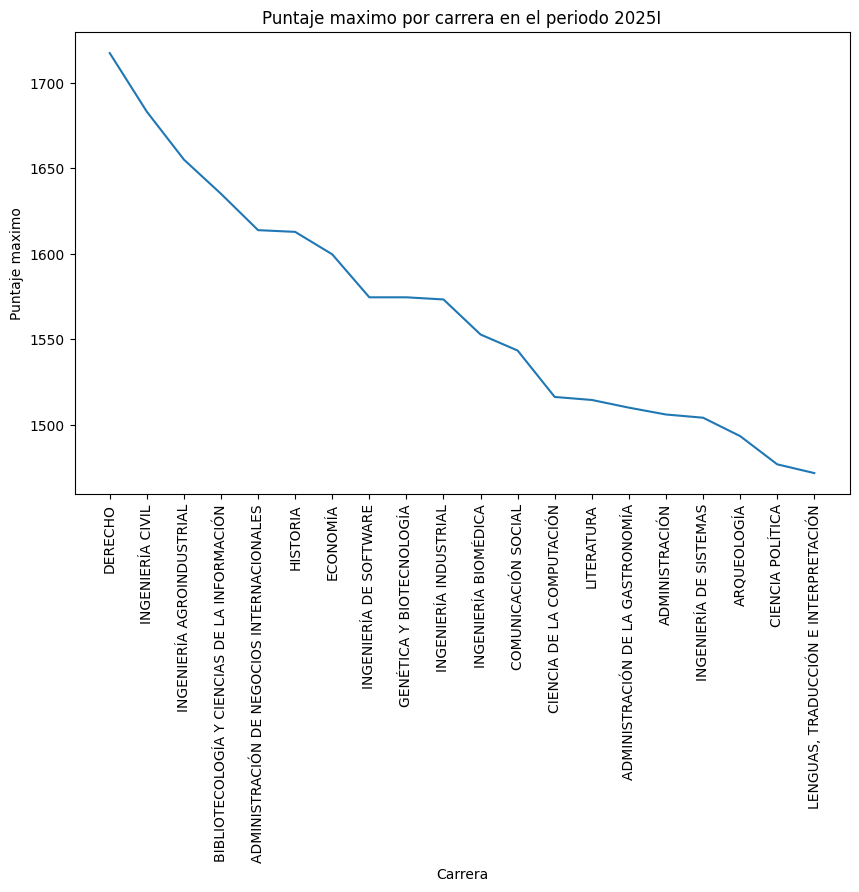

In [120]:
mean_score("2025I")

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.


In [121]:
df_numerico = resultados_exam.select_dtypes(include = 'number')

In [122]:
correlation = df_numerico.corr()
correlation

,score,merit_order
score,1.000000,-0.217487
merit_order,-0.217487,1.000000


<Axes: >

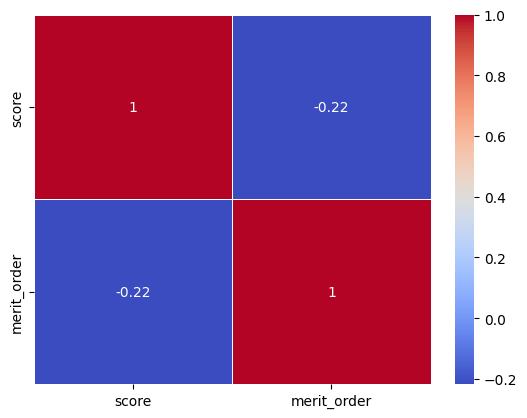

In [123]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', linewidths=0.5)

En primera instancia se puede observar que existe una ligera correlacion negativa entre ambas variables. Se podrá observar mejor con un grafico de regresion

<Axes: xlabel='merit_order', ylabel='score'>

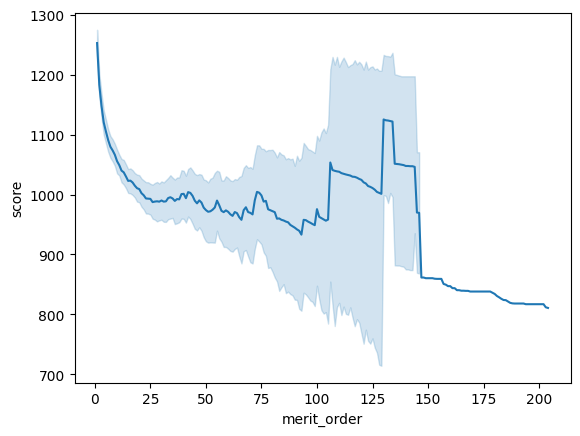

In [124]:
sns.lineplot(x= 'merit_order', y = 'score', data = resultados_exam)

Aqui se puede apreciar una tendencia negativa, ya que los orden de meritos mas cercanos al 0 tienden a tener puntajes mas altos a los que mas alejados. Lo cual es algo obvio, ya que los primeros puestos tienden a tener los puntajes mas altos para que puedan alcanzar una vacante.

¿Qué porcentaje de estudiantes por encima de 900 alcanzaron vacante?
Determina cuántos estudiantes con un puntaje superior a 900 alcanzaron una vacante

In [125]:
def score_900(periodo):
    score_period = resultados_exam[(resultados_exam['periodo'] == periodo) & (resultados_exam['score'] >= 900)] #filtramos por periodo y por puntajes mayores o iguales 900

    proportion = score_period.groupby('observation')['observation'].count().reset_index(name = 'count')  #agrupamos por observacion para contar cuantos postulantes alcanzaron vacantes
    proportion['proportion'] = proportion['count'] / proportion['count'].sum() * 100 # mostramos el porcentaje
    
    labels = proportion['observation'] #denominamos las etiquetas
    plt.pie(proportion['proportion'], labels=labels, autopct= '%1.1f%%') #mostramos los porcentajes en un grafico de pie
    plt.title(f"PROPORCION DE LOS POSTULANTES CON PUNTAJE MAYOR A 900 PUNTOS DEL {periodo}")


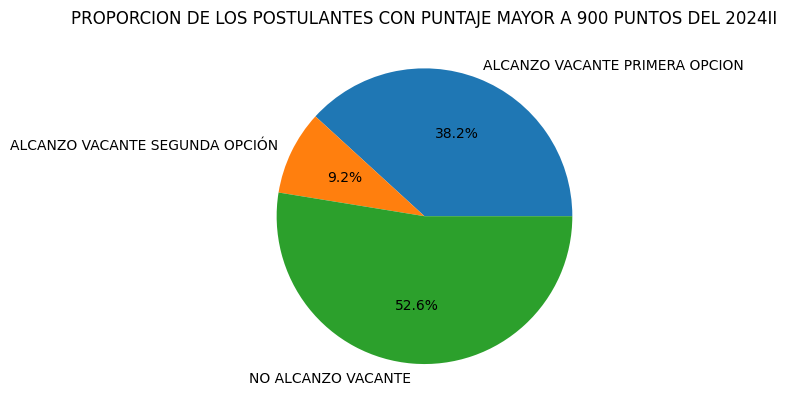

In [126]:
score_900('2024II')

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

In [127]:
period_high = resultados_exam.groupby('periodo').agg({'full_name':'nunique', 'score':'max'}).reset_index()
period_high

,periodo,full_name,score
0,2023II,24553,1556.375
1,2024I,28862,1704.250
2,2024II,22077,1563.125
3,2025I,18650,1717.370


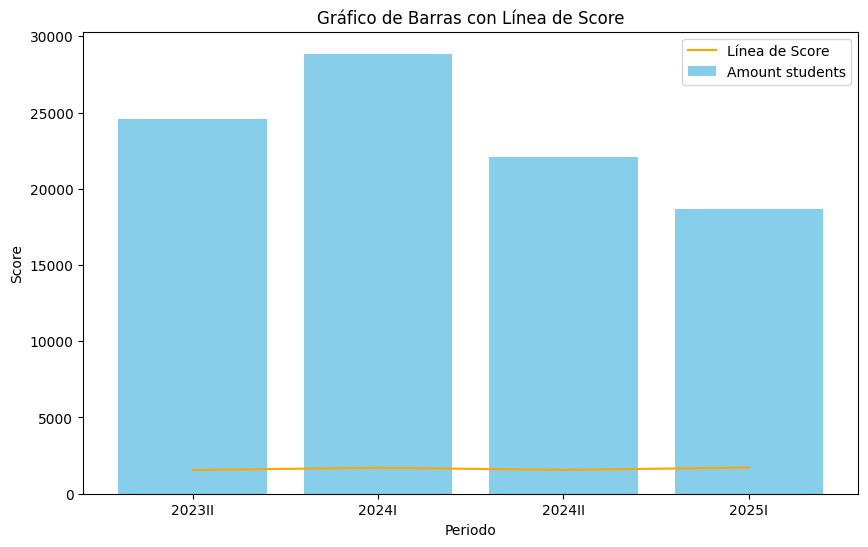

In [128]:
plt.figure(figsize=(10, 6))
x = range(len(period_high['periodo']))

# Graficar las barras
plt.bar(x, period_high['full_name'], label='Amount students', color='skyblue')

# Graficar la línea de score
plt.plot(x, period_high['score'], color='orange', label='Línea de Score')

# Configuración del gráfico
plt.xticks(x, period_high['periodo'])
plt.xlabel('Periodo')
plt.ylabel('Score')
plt.title('Gráfico de Barras con Línea de Score')
plt.legend()


# Mostrar el gráfico
plt.show()

¿Existen diferencias notables en puntajes entre las diferentes cohortes de carreras (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de las carreras en las diferentes cohortes.

In [129]:
def cohort_career(career):
    career_filtered = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION')]

    if not career_filtered.empty:
         cohort_students = career_filtered.pivot_table(index = 'career_1', columns='periodo', values='score', aggfunc='max')
         print(cohort_students)
         sns.heatmap(cohort_students, annot=True, fmt=".2f")
         plt.xlabel('Periodo')
         plt.ylabel('')
         plt.show()
    else:
        print('No se encontraron datos para la carrera seleccionada')


periodo                                       2023II     2024I    2024II  \
career_1                                                                   
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES  1331.875  1556.375  1563.125   

periodo                                        2025I  
career_1                                              
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES  1613.875  


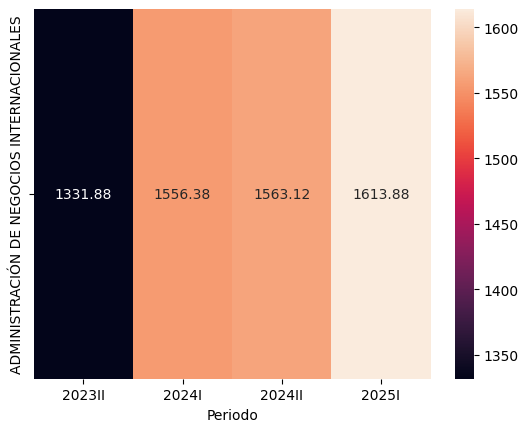

In [130]:
cohort_career('ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES')


¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.


In [131]:
#filtramos el dataframe con los postulantes que no ingresaron
sin_vacante = resultados_exam[(resultados_exam['observation'] == 'NO ALCANZO VACANTE')]
sin_vacante

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
...,...,...,...,...,...,...,...,...,...
94137,227692,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIA DE LA COMPUTACIÓN,1009.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94138,224825,"YUPANQUI CARPIO, DIEGO ANDRE",CIENCIA DE LA COMPUTACIÓN,1101.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94139,306406,"YUPANQUI TICLLACURI, ANDY",CIENCIA DE LA COMPUTACIÓN,1119.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94140,298747,"ZAPATA MOREYRA, ALEXIS EDUARDO",CIENCIA DE LA COMPUTACIÓN,790.125,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA


In [132]:
observation = sin_vacante.pivot_table(index='observation', columns='periodo', values='student_id', aggfunc='count').sort_values(by = 'observation',ascending=False).reset_index()
observation

periodo,observation,2023II,2024I,2024II,2025I
0,NO ALCANZO VACANTE,20348,26403,19238,16332


In [133]:
# Convertir a formato largo con melt
df_melt = observation.melt(id_vars='observation', var_name='periodo', value_name='cantidad')
df_melt

,observation,periodo,cantidad
0,NO ALCANZO VACANTE,2023II,20348
1,NO ALCANZO VACANTE,2024I,26403
2,NO ALCANZO VACANTE,2024II,19238
3,NO ALCANZO VACANTE,2025I,16332


Text(0.5, 1.0, 'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

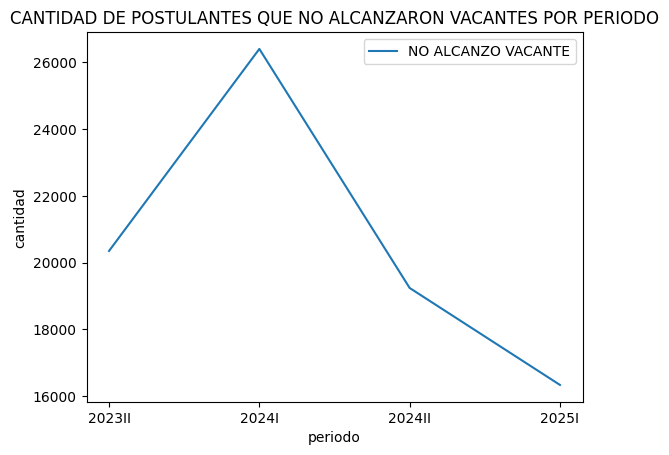

In [134]:
labels = ['NO ALCANZO VACANTE']
sns.lineplot(x='periodo', y='cantidad', data=df_melt)
plt.legend(labels=labels)
plt.title('CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

In [135]:
def wo_vacant(career):
    
    sin_vacante_filtered = sin_vacante[sin_vacante['career_1'] == career]

    if not sin_vacante_filtered.empty:
     wo_lineplot = sin_vacante_filtered.pivot_table(index = 'career_1', columns='periodo', values='student_id', aggfunc='count').reset_index()

     career_wo_vacant_melt = wo_lineplot.melt(id_vars= 'career_1', var_name='periodo', value_name='cantidad')
     sns.lineplot(x='periodo', y='cantidad', data=career_wo_vacant_melt, marker = 'o')
     plt.title(f'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTE DE {career}')
     for i in range(career_wo_vacant_melt.shape[0]):
        plt.text(career_wo_vacant_melt['periodo'][i], career_wo_vacant_melt['cantidad'][i], str(career_wo_vacant_melt['cantidad'][i]), 
             ha='center', va='bottom')

    else:
        print(f'No se encontraron datos para la carrera de {career}')
    
    return career_wo_vacant_melt


,career_1,periodo,cantidad
0,INGENIERÍA DE SOFTWARE,2023II,624
1,INGENIERÍA DE SOFTWARE,2024I,794
2,INGENIERÍA DE SOFTWARE,2024II,536
3,INGENIERÍA DE SOFTWARE,2025I,550


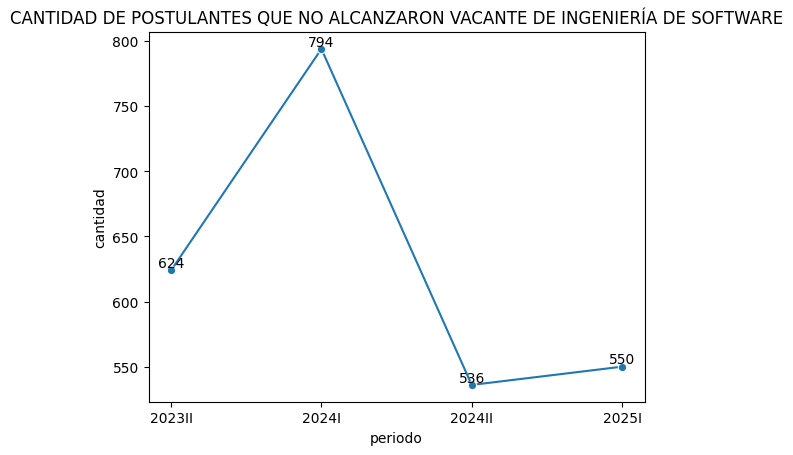

In [136]:
wo_vacant('INGENIERÍA DE SOFTWARE')

In [137]:
resultados_exam.head()

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA


In [138]:
resultados_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94142 entries, 0 to 94141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   94142 non-null  object 
 1   full_name    94142 non-null  object 
 2   career_1     94142 non-null  object 
 3   score        92962 non-null  float64
 4   merit_order  10641 non-null  float64
 5   observation  94142 non-null  object 
 6   periodo      94142 non-null  object 
 7   career_2     815 non-null    object 
 8   location     94142 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.5+ MB


In [139]:
areas_examen = [
    {'area_code': 'A', 'career_1': 'MEDICINA HUMANA'},
    {'area_code': 'A', 'career_1': 'OBSTETRICIA'},
    {'area_code': 'A', 'career_1': 'ENFERMERÍA'},
    {'area_code': 'A', 'career_1': 'TECNOLOGÍA MÉDICA'},
    {'area_code': 'A', 'career_1': 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICIÓN'},
    {'area_code': 'A', 'career_1': 'FARMACIA Y BIOQUÍMICA'},
    {'area_code': 'A', 'career_1': 'CIENCIAS DE LOS ALIMENTOS'},
    {'area_code': 'A', 'career_1': 'TOXICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'ODONTOLOGÍA'},
    {'area_code': 'A', 'career_1': 'MEDICINA VETERINARIA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA'},
    {'area_code': 'B', 'career_1': 'QUÍMICA'},
    {'area_code': 'B', 'career_1': 'CIENCIAS BIOLÓGICAS'},
    {'area_code': 'B', 'career_1': 'GENÉTICA Y BIOTECNOLOGÍA'},
    {'area_code': 'B', 'career_1': 'MICROBIOLOGÍA Y PARASITOLOGÍA'},
    {'area_code': 'B', 'career_1': 'FÍSICA'},
    {'area_code': 'B', 'career_1': 'MATEMÁTICA'},
    {'area_code': 'B', 'career_1': 'ESTADÍSTICA'},
    {'area_code': 'B', 'career_1': 'INVESTIGACIÓN OPERATIVA'},
    {'area_code': 'B', 'career_1': 'COMPUTACIÓN CIENTÍFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA QUÍMICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AGROINDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA MECÁNICA DE FLUIDOS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOLÓGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOGRÁFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE MINAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA METALÚRGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA CIVIL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AMBIENTAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA INDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA TEXTIL Y CONFECCIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SEGURIDAD Y SALUD EN EL TRABAJO'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELECTRÓNICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELÉCTRICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE TELECOMUNICACIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SISTEMAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SOFTWARE'},
    {'area_code': 'E', 'career_1': 'DERECHO'},
    {'area_code': 'E', 'career_1': 'CIENCIA POLÍTICA'},
    {'area_code': 'E', 'career_1': 'LITERATURA'},
    {'area_code': 'E', 'career_1': 'FILOSOFÍA'},
    {'area_code': 'E', 'career_1': 'LINGÜÍSTICA'},
    {'area_code': 'E', 'career_1': 'COMUNICACIÓN SOCIAL'},
    {'area_code': 'E', 'career_1': 'ARTE'},
    {'area_code': 'E', 'career_1': 'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN'},
    {'area_code': 'E', 'career_1': 'DANZA'},
    {'area_code': 'E', 'career_1': 'CONSERVACIÓN Y RESTAURACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN INICIAL'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN PRIMARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN SECUNDARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN FÍSICA'},
    {'area_code': 'E', 'career_1': 'HISTORIA'},
    {'area_code': 'E', 'career_1': 'SOCIOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ANTROPOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ARQUEOLOGÍA'},
    {'area_code': 'E', 'career_1': 'TRABAJO SOCIAL'},
    {'area_code': 'E', 'career_1': 'GEOGRAFÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE TURISMO'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES'},
    {'area_code': 'D', 'career_1': 'CONTABILIDAD'},
    {'area_code': 'D', 'career_1': 'GESTIÓN TRIBUTARIA'},
    {'area_code': 'D', 'career_1': 'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA PÚBLICA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA INTERNACIONAL'},
    {'area_code': 'A', 'career_1': 'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'TEC. MED. RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICION'},
    {'area_code': 'E', 'career_1': 'LINGUÍSTICA'},
    {'area_code': 'D', 'career_1': 'PRESUPUESTO Y FINANZAS PÚBLICAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA BIOMÉDICA'},
    {'area_code': 'B', 'career_1': 'CIENCIA DE LA COMPUTACIÓN'},
    {'area_code': 'E', 'career_1': 'LENGUAS, TRADUCCIÓN E INTERPRETACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE LA GASTRONOMÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN MARÍTIMA Y PORTUARIA'},
    {'area_code': 'D', 'career_1': 'MARKETING'},
    {'area_code':'C', 'career_1':'ARQUITECTURA Y URBANISMO'}

]

df_areas = pd.DataFrame(areas_examen)
# df_areas.to_csv('areas_sanmarcos', index = False)

In [140]:
uniques = df_areas['career_1'].unique()
uniques

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TECNOLOGÍA MÉDICA', 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TERAPIA FÍSICA Y REHABILITACIÓN', 'RADIOLOGÍA',
       'TERAPIA OCUPACIONAL', 'NUTRICIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'MEDICINA VETERINARIA', 'PSICOLOGÍA',
       'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA', 'QUÍMICA',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'FÍSICA', 'MATEMÁTICA',
       'ESTADÍSTICA', 'INVESTIGACIÓN OPERATIVA', 'COMPUTACIÓN CIENTÍFICA',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA MECÁNICA DE FLUIDOS', 'INGENIERÍA GEOLÓGICA',
       'INGENIERÍA GEOGRÁFICA', 'INGENIERÍA DE MINAS',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA CIVIL',
       'INGENIERÍA AMBIENTAL', 'INGENIERÍA INDUSTRIAL',
       'INGENIERÍA TEXTIL Y CONFECCIONES',
       'INGENIERÍA DE SEGURIDAD Y SALUD 

In [141]:
#separamos las ciudades de las carreras para un mejor analisis
#resultados_exam['location_2'] = resultados_exam['career_2'].str.extract(r' - (.+)')  # Extraer 'LIMA'
#resultados_exam['career_2'] = resultados_exam['career_2'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [142]:
def segunda_carrera(carrera, periodo):
    
    segunda_opcion = resultados_exam[(resultados_exam['career_1'] == carrera) & (resultados_exam['periodo'] == periodo) & (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ]  

    if not segunda_opcion.empty:
     heat_segundaopcion = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').reset_index().sort_values(by = carrera, ascending = False)
     heat_segundaopcion

     plt.figure(figsize=(10,6))
     sns.barplot(x = 'career_2', y = carrera, data=heat_segundaopcion )
     plt.xticks(rotation = 90)
     plt.title(f'CANTIDAD DE ALUMNOS QUE ESCOGEN OTRA CARRERA COMO SEGUNDA OPCION DE LA CARRERA DE {carrera}')

    else:
        print(f'No se encontraron datos para la carrera de {carrera}')
    
    return heat_segundaopcion


career_1,career_2,MEDICINA HUMANA
5,TEC. MED. RADIOLOGÍA,16
1,OBSTETRICIA,15
7,TEC. MED. TERAPIA OCUPACIONAL,10
6,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,9
8,TOXICOLOGÍA,8
0,CIENCIAS DE LOS ALIMENTOS,6
3,PSICOLOGÍA - HUARMEY,2
4,PSICOLOGÍA - VILLA RICA,1
2,PSICOLOGÍA - CHILCA,1


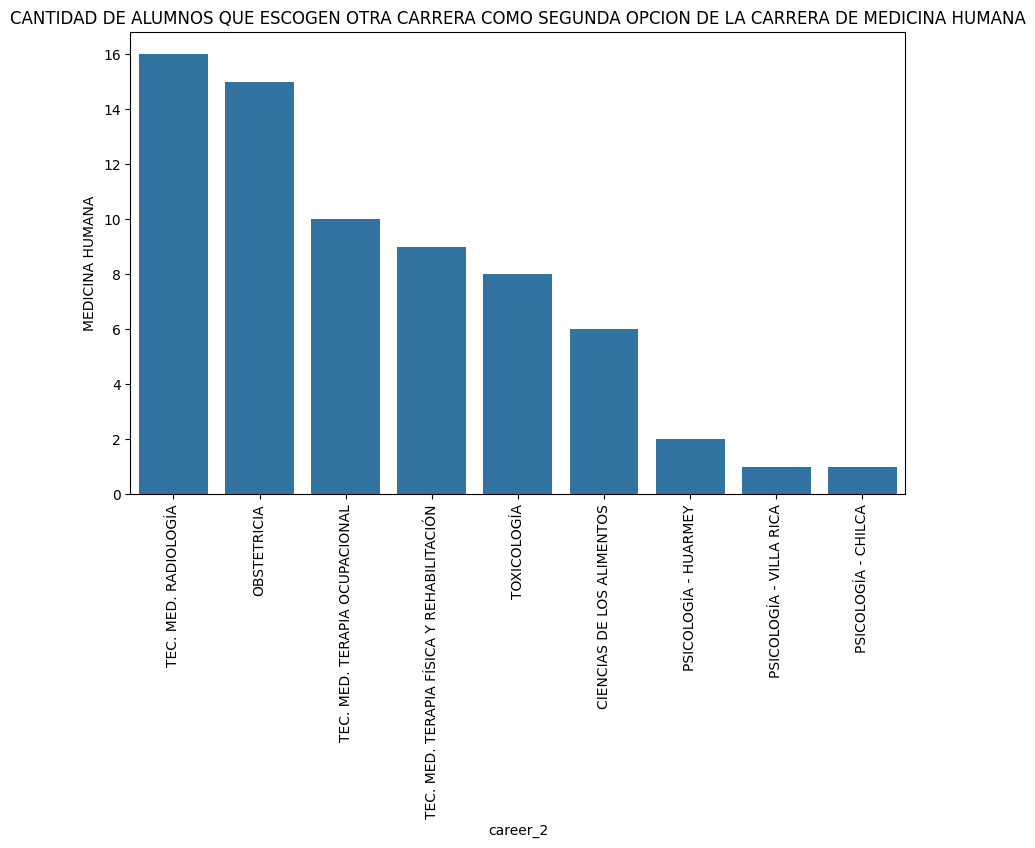

In [143]:
segunda_carrera('MEDICINA HUMANA', '2024II')

In [144]:
segunda_opcion = resultados_exam[(resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ] 


second_choice = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').fillna(0).reset_index()
second_choice.head()

career_1,career_2,ADMINISTRACIÓN,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,CIENCIA POLÍTICA,CIENCIAS DE LA COMPUTACIÓN,COMUNICACIÓN SOCIAL,CONTABILIDAD,DERECHO,ECONOMÍA,...,INGENIERÍA ELECTRÓNICA,INGENIERÍA GEOLÓGICA,INGENIERÍA INDUSTRIAL,"LENGUAS, TRADUCCIÓN E INTERPRETACIÓN",LITERATURA,MARKETING,MEDICINA HUMANA,MEDICINA VETERINARIA,ODONTOLOGÍA,PSICOLOGÍA
0,ADMINISTRACIÓN - HUARAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADMINISTRACIÓN - S.J.L,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ADMINISTRACIÓN DE LA GASTRONOMÍA,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADMINISTRACIÓN DE TURISMO - LIMA,4.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ADMINISTRACIÓN DE TURISMO - S.J.L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
resultados_exam.columns

Index(['student_id', 'full_name', 'career_1', 'score', 'merit_order',
       'observation', 'periodo', 'career_2', 'location'],
      dtype='object')

In [146]:
df_merge = resultados_exam.merge(df_areas, on='career_1', how = 'outer')
df_merge.sample(5)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location,area_code
13775,715801,"BARREDA MEDRANO, BELINDA HADE",COMUNICACIÓN SOCIAL,439.000,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA,E
3707,580764,"HUAMAN CASTILLO, BRAYAN DAVID BELISARIO",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,740.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,D
63976,280197,"MEJÍA OLIVEROS, AYRTON LEONARDO",INGENIERÍA INDUSTRIAL,697.750,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA,C
36560,174142,"GARIBAY BACILIO, DANIELA JENIFER",ENFERMERÍA,636.125,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA,A
4622,577716,"FORAQUITA QUISPE, KAYLA ANTUANET",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,629.125,NaN,NO ALCANZO VACANTE,2024I,NaN,LIMA,D


In [147]:
area_periodo_filtered = resultados_exam[resultados_exam['periodo'] == '2023I']

In [148]:
#mostramos un dataframe con el numero de postulantes y numero de ingresantes

competencia = df_merge.pivot_table(index='area_code', columns='observation', values ='student_id', aggfunc='count').fillna(0).reset_index()
competencia['total_estudiantes'] = competencia['ALCANZO VACANTE PRIMERA OPCION'] + competencia['ALCANZO VACANTE SEGUNDA OPCIÓN'] + competencia['ANULADO'] + competencia['AUSENTE'] + competencia['NO ALCANZO VACANTE']

In [149]:
competencia = competencia[
    ['area_code','ALCANZO VACANTE PRIMERA OPCION', 'ALCANZO VACANTE SEGUNDA OPCIÓN', 'total_estudiantes']
].dropna(axis = 1)

In [150]:
competencia

observation,area_code,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,total_estudiantes
0,A,1266.0,138.0,26277.0
1,B,889.0,17.0,3194.0
2,C,2185.0,227.0,26675.0
3,D,2923.0,223.0,17858.0
4,E,2535.0,209.0,19975.0


<Axes: xlabel='periodo', ylabel='full_name'>

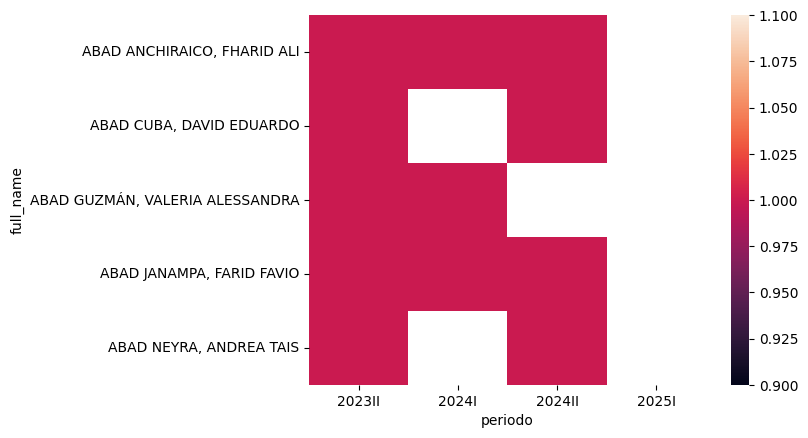

In [151]:
#cantidad de estudiantes por location y puntajes

score_location = resultados_exam.pivot_table(index='full_name', columns='periodo', values = 'student_id', aggfunc='count').fillna(0)
score_location['total_intentos'] = score_location['2023II'] + score_location['2024I'] + score_location['2024II']
score_location = score_location[score_location['total_intentos'] > 1]
score_location.sort_values(by = 'total_intentos', ascending=False)

mask = score_location.iloc[:,:-1].head() == 0

sns.heatmap(score_location.iloc[:, :-1].head(),
            linecolor='black',
            mask = mask)

In [152]:
score_location.head()

periodo,2023II,2024I,2024II,2025I,total_intentos
full_name,,,,,
"ABAD ANCHIRAICO, FHARID ALI",1.0,1.0,1.0,0.0,3.0
"ABAD CUBA, DAVID EDUARDO",1.0,0.0,1.0,0.0,2.0
"ABAD GUZMÁN, VALERIA ALESSANDRA",1.0,1.0,0.0,0.0,2.0
"ABAD JANAMPA, FARID FAVIO",1.0,1.0,1.0,0.0,3.0
"ABAD NEYRA, ANDREA TAIS",1.0,0.0,1.0,0.0,2.0


In [153]:
score_location_groupby = resultados_exam.groupby('location').agg({
    'score':'max',
    'student_id':'count'
}).fillna(0)

score_location_groupby

,score,student_id
location,,
CHILCA,889.250,29
HUARAL,1092.625,149
HUARMEY,774.750,5
LIMA,1717.370,93383
OYÓN,901.500,17
S.J.L,1298.875,498
VILLA RICA,1239.500,61


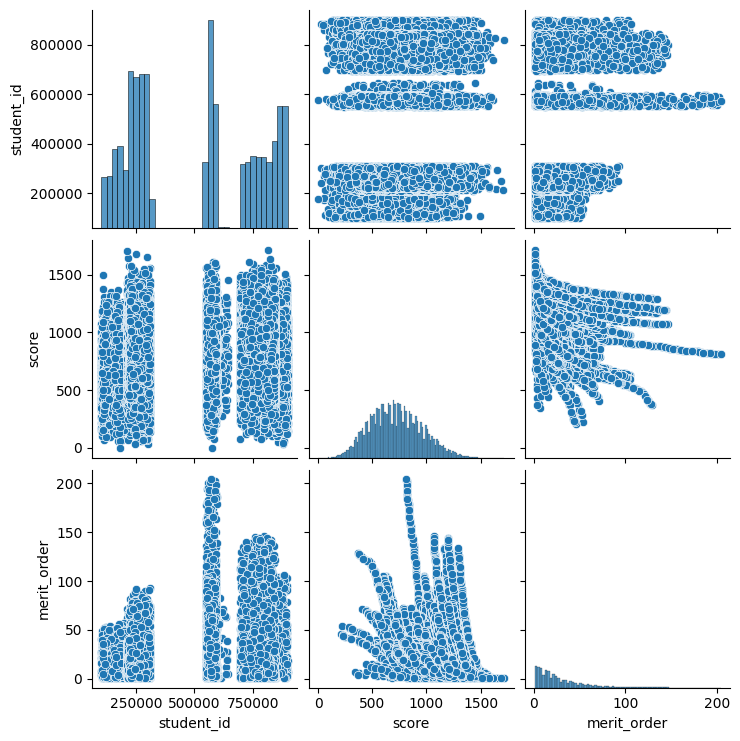

In [154]:
sns.pairplot(resultados_exam)

In [155]:
ingresados = resultados_exam.pivot_table(
    index = 'periodo', columns='observation', values = 'student_id', aggfunc='count'
).fillna(0)

In [156]:
ingresados['total_students'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] + ingresados['ALCANZO VACANTE SEGUNDA OPCIÓN'] + ingresados['ANULADO'] + ingresados['AUSENTE'] + ingresados['NO ALCANZO VACANTE']


In [157]:
ingresados['PORCENTAJE'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] / ingresados['total_students'] * 100

In [158]:
ingresados

observation,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,ANULADO,AUSENTE,NO ALCANZO VACANTE,total_students,PORCENTAJE
periodo,,,,,,,
2023II,3751.0,0.0,0.0,454.0,20348.0,24553.0,15.277156
2024I,1821.0,303.0,1.0,334.0,26403.0,28862.0,6.309334
2024II,2118.0,512.0,0.0,209.0,19238.0,22077.0,9.593695
2025I,2136.0,0.0,0.0,182.0,16332.0,18650.0,11.453083


In [159]:
funnel_df = resultados_exam.groupby('observation').agg({
    'student_id': 'count'
}).sort_values(by = 'student_id', ascending = False).reset_index()

In [160]:
funnel_df

,observation,student_id
0,NO ALCANZO VACANTE,82321
1,ALCANZO VACANTE PRIMERA OPCION,9826
2,AUSENTE,1179
3,ALCANZO VACANTE SEGUNDA OPCIÓN,815
4,ANULADO,1


In [161]:
funnel = resultados_exam.pivot_table(
    index = 'career_1',
    columns= 'observation',
    values= 'student_id',
    aggfunc='count'
).fillna(0).reset_index()

funnel['total_studiantes'] = (
        funnel.get('ALCANZO VACANTE PRIMERA OPCION', 0) 
      + funnel.get('ALCANZO VACANTE SEGUNDA OPCION', 0)
      + funnel.get('ANULADO', 0)
      + funnel.get('AUSENTE', 0)
      + funnel.get('NO ALCANZO VACANTE', 0)
)

funnel.head()

observation,career_1,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,ANULADO,AUSENTE,NO ALCANZO VACANTE,total_studiantes
0,ADMINISTRACIÓN,422.0,33.0,0.0,30.0,2689.0,3141.0
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,23.0,0.0,0.0,9.0,195.0,227.0
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,267.0,60.0,0.0,44.0,3223.0,3534.0
3,ADMINISTRACIÓN DE TURISMO,230.0,0.0,0.0,2.0,558.0,790.0
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,31.0,2.0,0.0,2.0,247.0,280.0


In [162]:
resultados_exam.columns

Index(['student_id', 'full_name', 'career_1', 'score', 'merit_order',
       'observation', 'periodo', 'career_2', 'location'],
      dtype='object')

In [163]:
students_career = resultados_exam.pivot_table(
    index = 'career_1',
    columns= 'periodo',
    values = 'student_id',
    aggfunc= 'count'
)

students_career

periodo,2023II,2024I,2024II,2025I
career_1,,,,
ADMINISTRACIÓN,818.0,960.0,695.0,701.0
ADMINISTRACIÓN DE LA GASTRONOMÍA,NaN,NaN,101.0,126.0
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0
ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0
ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,NaN,NaN,122.0,160.0
...,...,...,...,...
TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,NaN
TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,NaN
TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,NaN


In [164]:
#primera_opcion = resultados_exam[resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION']

In [165]:
relation = resultados_exam.groupby('career_1').agg({'student_id':'count', 'score':'max'}).reset_index()
relation

,career_1,student_id,score
0,ADMINISTRACIÓN,3174,1535.250
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,227,1510.125
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,3594,1613.875
3,ADMINISTRACIÓN DE TURISMO,790,1326.250
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,282,1387.375
...,...,...,...
74,TEC. MED. RADIOLOGÍA,300,1199.500
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,417,1185.375
76,TEC. MED. TERAPIA OCUPACIONAL,182,1010.750
77,TOXICOLOGÍA,113,1119.500


In [166]:
student_count = resultados_exam.pivot_table(
    index='career_1',
    columns='periodo',
    values='student_id',
    aggfunc='count'
).fillna(0).reset_index()

student_count

periodo,career_1,2023II,2024I,2024II,2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0
...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0


In [167]:
score_mean = resultados_exam.groupby('career_1')['score'].mean()

In [168]:
score_max = resultados_exam.groupby('career_1')['score'].max()

In [169]:
score_min = resultados_exam.groupby('career_1')['score'].min()

In [170]:
num_merge = student_count.merge(
    score_mean,
    on = 'career_1',
    how = 'inner'

)
num_merge

,career_1,2023II,2024I,2024II,2025I,score
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,753.201813
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,756.767202
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,748.375494
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,734.617069
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,817.602679
...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0,635.586735
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0,592.972760
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0,595.649306
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0,648.830357


In [171]:
num_ = num_merge.merge(
    score_max,
    on = 'career_1',
    how = 'inner'
)

num_

,career_1,2023II,2024I,2024II,2025I,score_x,score_y
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,753.201813,1535.250
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,756.767202,1510.125
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,748.375494,1613.875
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,734.617069,1326.250
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,817.602679,1387.375
...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0,635.586735,1199.500
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0,592.972760,1185.375
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0,595.649306,1010.750
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0,648.830357,1119.500


In [172]:
num_df = num_.merge(
    score_min,
    on = 'career_1',
    how = 'inner'
)

num_df

,career_1,2023II,2024I,2024II,2025I,score_x,score_y,score
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,753.201813,1535.250,104.000
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,756.767202,1510.125,209.375
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,748.375494,1613.875,77.750
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,734.617069,1326.250,198.125
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,817.602679,1387.375,302.875
...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0,635.586735,1199.500,181.750
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0,592.972760,1185.375,92.750
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0,595.649306,1010.750,162.625
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0,648.830357,1119.500,255.875


In [173]:
columns = {
    'score_x':'score_mean',
    'score_y':'score_max',
    'score':'score_min'
}

num_df.rename(columns=columns)

,career_1,2023II,2024I,2024II,2025I,score_mean,score_max,score_min
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,753.201813,1535.250,104.000
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,756.767202,1510.125,209.375
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,748.375494,1613.875,77.750
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,734.617069,1326.250,198.125
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,817.602679,1387.375,302.875
...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0,635.586735,1199.500,181.750
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0,592.972760,1185.375,92.750
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0,595.649306,1010.750,162.625
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0,648.830357,1119.500,255.875


In [174]:
features = num_df.drop(['career_1'], axis = 1)

In [176]:
#normalizamos las caracterizticas 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_scaled

array([[ 9.07412358e-01,  8.04944874e-01,  7.84223323e-01,
         1.26072619e+00,  3.05028284e-01,  8.43650195e-01,
        -6.18667882e-01],
       [-5.56033233e-01, -4.94536144e-01, -3.36785074e-01,
        -2.98490972e-01,  3.48574238e-01,  6.75051765e-01,
         3.31199679e-01],
       [ 1.00759934e+00,  9.34892976e-01,  8.84245958e-01,
         1.84373782e+00,  2.46081937e-01,  1.37125424e+00,
        -8.55289695e-01],
       [-1.64230563e-01, -2.10274671e-01, -2.12228585e-01,
        -1.14096595e-01,  7.80431052e-02, -5.58820332e-01,
         2.29790331e-01],
       [-5.56033233e-01, -4.94536144e-01, -2.97153464e-01,
        -2.06293784e-01,  1.09158965e+00, -1.48648030e-01,
         1.17402404e+00],
       [-4.34377610e-01, -4.28208467e-01, -4.55679904e-01,
        -4.20516663e-01,  6.93822031e-01, -1.18372496e+00,
         6.96273333e-01],
       [-4.63002462e-01, -4.03843198e-01, -4.29258831e-01,
        -4.61191893e-01,  6.30008746e-01,  5.63491609e-01,
         5.0922942

In [201]:
# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [204]:
# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster'] = num_df['CLUSTER']  # Asumiendo que tienes una columna de clúster ya asignada
df_pca

,PC1,PC2,PC3,cluster
0,2.042137,0.573833,-0.515755,1
1,-0.722193,0.663568,-0.388510,0
2,2.608725,0.806995,-1.051004,1
3,-0.540934,-0.094117,0.307599,0
4,-1.145580,1.248157,0.603655,0
...,...,...,...,...
74,-1.086699,-1.536944,0.559821,0
75,-0.778348,-2.322591,0.121989,0
76,-1.445488,-2.510594,0.991221,0
77,-1.568076,-1.340722,1.164116,0


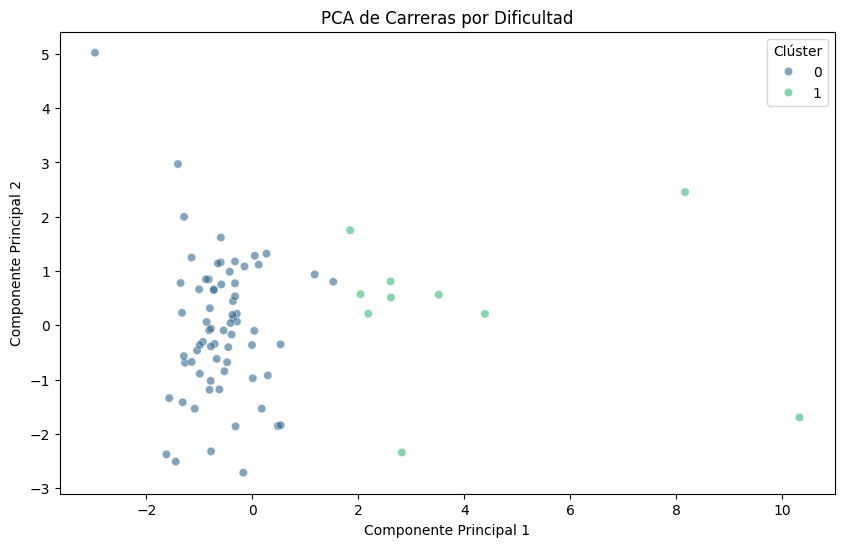

In [208]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', alpha=0.6)
plt.title('PCA de Carreras por Dificultad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.show()

In [200]:
# Imprimir la varianza explicada
print('Varianza explicada por cada componente:')
print(pca.explained_variance_ratio_)

Varianza explicada por cada componente:
[0.53106487 0.24029985]


In [209]:
# Acceder a las componentes principales
components = pca.components_

# Crear un DataFrame para visualizar las contribuciones
components_df = pd.DataFrame(components, columns=features)
components_df.index = [f'Componente {i+1}' for i in range(components.shape[0])]
print(components_df)

ValueError: Index data must be 1-dimensional

In [183]:
# Suponiendo que el clúster 0 es "Difícil" y el clúster 1 es "Fácil"
num_df['dificultad'] = num_df['CLUSTER'].apply(lambda x: 'Difícil' if x == 1 else 'Fácil')

In [184]:
num_df

,career_1,2023II,2024I,2024II,2025I,score_x,score_y,score,CLUSTER,dificultad
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,753.201813,1535.250,104.000,1,Difícil
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,756.767202,1510.125,209.375,0,Fácil
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,748.375494,1613.875,77.750,1,Difícil
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,734.617069,1326.250,198.125,0,Fácil
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,817.602679,1387.375,302.875,0,Fácil
...,...,...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,0.0,635.586735,1199.500,181.750,0,Fácil
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,0.0,592.972760,1185.375,92.750,0,Fácil
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,0.0,595.649306,1010.750,162.625,0,Fácil
77,TOXICOLOGÍA,51.0,39.0,23.0,0.0,648.830357,1119.500,255.875,0,Fácil


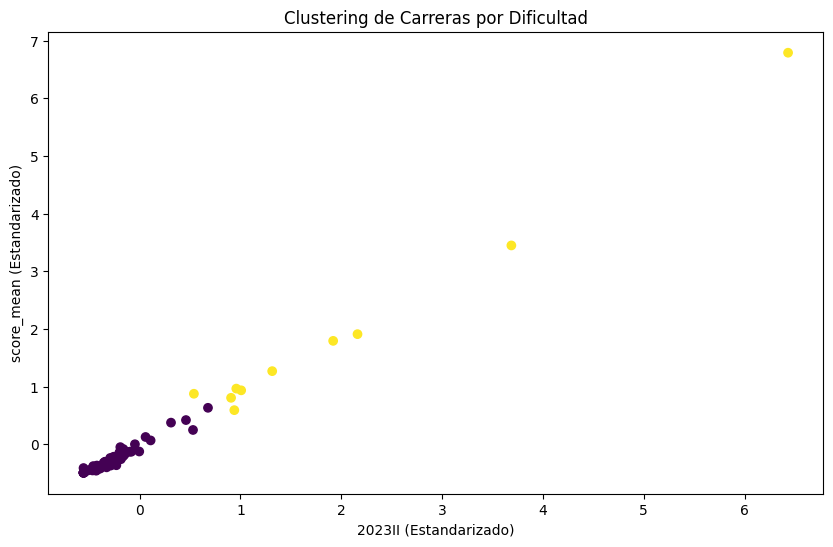

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('2023II (Estandarizado)')
plt.ylabel('score_mean (Estandarizado)')
plt.title('Clustering de Carreras por Dificultad')
plt.show()


In [186]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5337602827837562


In [187]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"K={k}, Silhouette Score: {score}")

K=2, Silhouette Score: 0.5337602827837562
K=3, Silhouette Score: 0.26060213543414606
K=4, Silhouette Score: 0.2883539564013151
K=5, Silhouette Score: 0.25031882903575625


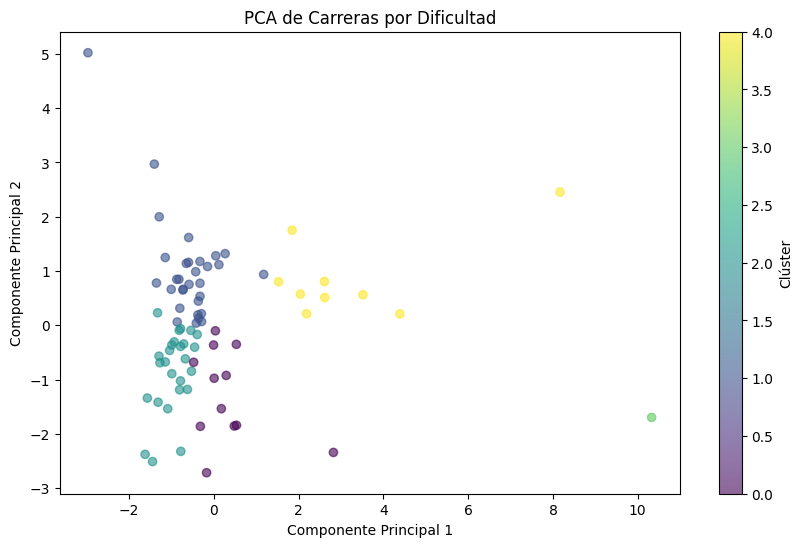

In [188]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title('PCA de Carreras por Dificultad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()